In [ ]:
# EXAMPLE: Location Estimates of Population and Murder Rates
# TASK: compute the mean, trimmed mean, and median for the population

In [27]:
#pip install wquantiles

Note: you may need to restart the kernel to use updated packages.


In [13]:
#import needed packages

import os
import csv
import numpy as np
import pandas as p
from scipy import stats
import weighted
import matplotlib as mp

In [2]:
os.getcwd()
os.chdir("/Users/susheel/Documents/GitHub/statistics-for-data-scientists/data")   #FILE DIRECTORY IN QUOTES
#os.listdir()

In [3]:
state = p.read_csv(filepath_or_buffer = "state.csv")

In [14]:
np.mean(state.Population)

6162876.3

In [18]:
#have to use a different package (scipy) to calculate the trimmed mean
stats.trim_mean(state.Population, 0.1)

4783697.125

In [15]:
np.median(state.Population)

4436369.5

In [ ]:
# TASK: compute average murder rate for country

In [25]:
round(np.average(state['Murder.Rate'], weights = state.Population), 6)

4.445834

In [29]:
weighted.median(state['Murder.Rate'], state['Population'])

4.4

In [ ]:
# TASK: compute the standard deviation, IQR and median absolute devision for the population

In [7]:
np.std(state['Population'])

#numpy std f'n might return values differing R because R uses n-1 df while numpy uses n

6779407.114632265

In [8]:
np.std(state['Population'], ddof = 1)

6848235.347401142

In [13]:
stats.iqr(state['Population'])

#numpy does not have a built-in IQR function but scipy does; if anything, below cell contains iqr function calculated through (q3 - q1) with numpy.percentile function -- arriving at the same answer

4847308.0

In [15]:
q3 = np.percentile(state['Population'], 75)
q1 = np.percentile(state['Population'], 25)

iqr = q3 - q1
print(iqr)

4847308.0


In [19]:
stats.median_abs_deviation(state['Population'])

#differs from the R value (3849870) so implementing formula manually in below cell

2596702.0

In [5]:
#type(state['Population'])

median_minus_observed = p.Series()
median_minus_observed = state['Population'] - np.median(state['Population'])
abs_median_minus_observed = np.absolute(median_minus_observed)
median_absolute_deviation = np.median(abs_median_minus_observed)
median_absolute_deviation

#receiving same result (2596702) in R when manually calculating Median Absolute Deviation
# also receiving same result (2596702) in R when using mad() f'n and constant = 1

<ipython-input-5-1f7b6a962419>:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  median_minus_observed = p.Series()


2596702.0

In [14]:
#stats.median_absolute_deviation(state['Population'])
#when performing the above function, receiving a DeprecationWarning: 
'''
<ipython-input-10-a731dec4ff69>:1: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  stats.median_absolute_deviation(state['Population'])
'''

stats.median_abs_deviation(state['Population'], scale = 1)
#when scale = 1, receiving 2596702.0
#when scale = 1/1.4826, receiving 3849870.3852

2596702.0

In [5]:
# Percentiles of the Murder Rate by State

np.percentile(state['Murder.Rate'], 5)

6.51

In [9]:
np.percentile(state['Murder.Rate'], 25)

2.425

In [10]:
np.percentile(state['Murder.Rate'], 50)

4.0

In [11]:
np.percentile(state['Murder.Rate'], 75)

5.549999999999999

In [12]:
np.percentile(state['Murder.Rate'], 95)

6.51

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9399157b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9399160280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f93991577f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9399160940>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9399160ca0>],
 'means': []}

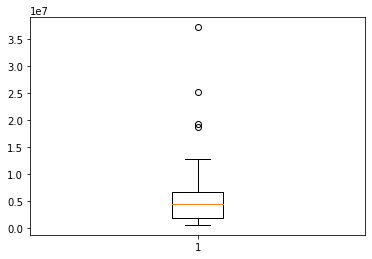

In [16]:
# Boxplot of the Population by State

#matplotlib
mp.pyplot.boxplot(state['Population'])

#pandas
#state.boxplot('Population')

In [21]:
# IGNORE

#Frequency table of Population 

#no standard function to do this in Python, have to do this in conjunction with numpy.histogram function 

#1: make breaks
max_state_pop = max(state['Population'])
min_state_pop = min(state['Population'])

range_state_pop = max_state_pop - min_state_pop
bin_size = range_state_pop / 10

In [27]:
#Frequency table of Population 

Abs_frecuency, intervals = np.histogram(state['Population'], bins = 10)

df = p.DataFrame(index = np.linspace(1,10,10), columns = ['start', 'end', 'state_population','Frec_abs'])
# Assign the intervals
df['start'] = intervals[:-1]
df['end'] = intervals[1:]
# Calculate class marks
df['state_population'] = (df['start'] + df['end'])/2
# Assing Absolute frecuency
df['Frec_abs'] = Abs_frecuency

#df

#REFERENCE: https://medium.com/pythoneers/histograms-and-frequently-table-in-python-an-approximation-to-the-selection-of-the-number-of-bins-312965281857

,start,end,state_population,Frec_abs
1.0,563626.0,4232659.0,2398142.5,24
2.0,4232659.0,7901692.0,6067175.5,14
3.0,7901692.0,11570725.0,9736208.5,6
4.0,11570725.0,15239758.0,13405241.5,2
5.0,15239758.0,18908791.0,17074274.5,1
6.0,18908791.0,22577824.0,20743307.5,1
7.0,22577824.0,26246857.0,24412340.5,1
8.0,26246857.0,29915890.0,28081373.5,0
9.0,29915890.0,33584923.0,31750406.5,0
10.0,33584923.0,37253956.0,35419439.5,1


array([[<AxesSubplot:title={'center':'Population'}>]], dtype=object)

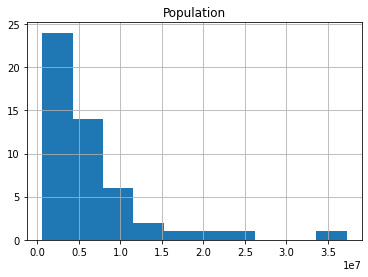

In [36]:
# Histogram of State Population

state.hist(['Population'], bins = 10)